# Test 1

### Packages

In [1]:
import pandas as pd
import seaborn as sns
import os

os.chdir('/Users/tristanmayer/Documents/GitHub/taxi-time')
from src.preprocessing import *
from src.master import *

### Data

In [4]:
df1 = cleaning_airport_df('data/0. Airport data/Airport_Data.csv')

/Users/tristanmayer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [5]:
df2 = get_df_of_obs1(df1)

In [6]:
df3 = get_target_values(df2)

In [7]:
df1.head()

,carrier,flight,acType,sto,runway,stand,aldt,eibt,cibt,aibt,chocks_on,eobt,aobt,atot
0,CAR1,NaN,MD88,undefined,NaN,STAND01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAR1,NaN,MD88,undefined,NaN,STAND01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CRJ/9,7/30/2018 4:18,NaN,STAND02,NaN,7/30/2018 4:18,NaN,NaN,NaN,NaN,NaN,NaN
3,CAR1,27,A350/9,7/30/2018 4:19,RUNWAY01,STAND03,NaN,NaN,NaN,NaN,NaN,7/30/2018 4:19,7/30/2018 4:18,7/30/2018 4:33
4,CAR1,2519,B737/9-WL,7/30/2018 4:45,RUNWAY02,STAND04,7/30/2018 4:25,7/30/2018 4:33,7/30/2018 4:33,7/30/2018 4:29,7/30/2018 4:30,NaN,NaN,NaN


In [2]:
df = master_preprocessing_X('data/0. Airport data/Airport_Data.csv',
                              'data/2. Weather data/weather_data_prep.csv',
                              'data/1. AC characteristics/ACchar.xlsx',
                              'Correspondance.pkl')

/Users/tristanmayer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


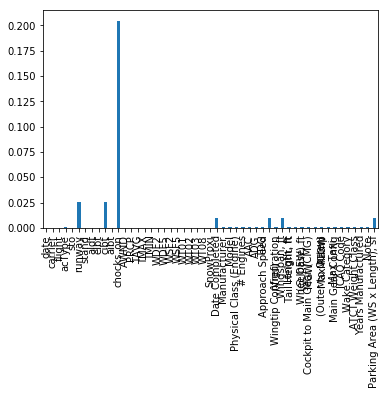

In [6]:
(df.isna().sum()/len(df)).plot.bar()

In [16]:
design_matrix_airport_data('data/0. Airport data/Airport_Data.csv')

/Users/tristanmayer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,carrier,flight,acType,sto,runway,stand,aldt,eibt,cibt,aibt,chocks_on
4,CAR1,2519,B737/9-WL,7/30/2018 4:45,RUNWAY02,STAND04,7/30/2018 4:25,7/30/2018 4:33,7/30/2018 4:33,7/30/2018 4:29,7/30/2018 4:30
7,CAR1,1757,B757/2-WL,7/30/2018 8:53,RUNWAY02,STAND07,7/30/2018 8:14,7/30/2018 8:19,7/30/2018 8:18,7/30/2018 8:18,7/30/2018 8:19
8,CAR1,1636,A321/2,7/30/2018 8:49,RUNWAY01,STAND08,7/30/2018 8:26,7/30/2018 8:31,7/30/2018 8:32,7/30/2018 8:29,7/30/2018 8:30
9,CAR1,2048,B737/9-WL,7/30/2018 8:56,RUNWAY02,STAND09,7/30/2018 8:42,7/30/2018 8:47,7/30/2018 8:45,7/30/2018 8:46,NaN
11,CAR1,2510,A321/2,7/30/2018 9:14,RUNWAY02,STAND11,7/30/2018 8:52,7/30/2018 8:57,7/30/2018 8:57,7/30/2018 8:57,7/30/2018 8:58
14,CAR1,110,A330/3,7/30/2018 9:30,RUNWAY01,STAND14,7/30/2018 9:07,7/30/2018 9:15,7/30/2018 9:16,7/30/2018 9:17,NaN
15,CAR1,423,B737/9-WL,7/30/2018 9:23,RUNWAY02,STAND15,7/30/2018 9:10,7/30/2018 9:16,7/30/2018 9:17,7/30/2018 9:16,7/30/2018 9:17
16,CAR1,146,B767/3-WL,7/30/2018 9:32,RUNWAY01,STAND16,7/30/2018 9:10,7/30/2018 9:18,7/30/2018 9:15,7/30/2018 9:17,NaN
17,CAR1,1943,B777/2-LR,7/30/2018 8:14,RUNWAY01,STAND03,7/30/2018 9:21,7/30/2018 9:28,7/30/2018 9:27,7/30/2018 9:28,NaN
18,CAR1,2678,B737/9-WL,7/30/2018 9:47,RUNWAY03,STAND17,7/30/2018 9:27,7/30/2018 9:35,7/30/2018 9:33,7/30/2018 9:33,7/30/2018 9:33


In [17]:
df2

,carrier,flight,acType,sto,runway,stand,aldt,eibt,cibt,aibt,chocks_on
4,CAR1,2519,B737/9-WL,7/30/2018 4:45,RUNWAY02,STAND04,7/30/2018 4:25,7/30/2018 4:33,7/30/2018 4:33,7/30/2018 4:29,7/30/2018 4:30
7,CAR1,1757,B757/2-WL,7/30/2018 8:53,RUNWAY02,STAND07,7/30/2018 8:14,7/30/2018 8:19,7/30/2018 8:18,7/30/2018 8:18,7/30/2018 8:19
8,CAR1,1636,A321/2,7/30/2018 8:49,RUNWAY01,STAND08,7/30/2018 8:26,7/30/2018 8:31,7/30/2018 8:32,7/30/2018 8:29,7/30/2018 8:30
9,CAR1,2048,B737/9-WL,7/30/2018 8:56,RUNWAY02,STAND09,7/30/2018 8:42,7/30/2018 8:47,7/30/2018 8:45,7/30/2018 8:46,NaN
11,CAR1,2510,A321/2,7/30/2018 9:14,RUNWAY02,STAND11,7/30/2018 8:52,7/30/2018 8:57,7/30/2018 8:57,7/30/2018 8:57,7/30/2018 8:58
14,CAR1,110,A330/3,7/30/2018 9:30,RUNWAY01,STAND14,7/30/2018 9:07,7/30/2018 9:15,7/30/2018 9:16,7/30/2018 9:17,NaN
15,CAR1,423,B737/9-WL,7/30/2018 9:23,RUNWAY02,STAND15,7/30/2018 9:10,7/30/2018 9:16,7/30/2018 9:17,7/30/2018 9:16,7/30/2018 9:17
16,CAR1,146,B767/3-WL,7/30/2018 9:32,RUNWAY01,STAND16,7/30/2018 9:10,7/30/2018 9:18,7/30/2018 9:15,7/30/2018 9:17,NaN
17,CAR1,1943,B777/2-LR,7/30/2018 8:14,RUNWAY01,STAND03,7/30/2018 9:21,7/30/2018 9:28,7/30/2018 9:27,7/30/2018 9:28,NaN
18,CAR1,2678,B737/9-WL,7/30/2018 9:47,RUNWAY03,STAND17,7/30/2018 9:27,7/30/2018 9:35,7/30/2018 9:33,7/30/2018 9:33,7/30/2018 9:33
